## Import

In [12]:
#"Conv2D" is used for images and Conv3D is used for Videos
#The fully connected layers are called "Dense" layer in Keras
#"Flatten" which flattens a multi dimensional vector to single dimensional vector

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

## Load Dataset

In [14]:
x_train=np.loadtxt('input.csv',delimiter=',')
y_train=np.loadtxt('labels.csv',delimiter=',')

x_test=np.loadtxt('input_test.csv',delimiter=',')
y_test=np.loadtxt('labels_test.csv',delimiter=',')

In [15]:
print("Shape of x_train: ",x_train.shape)
print("Shape of y_test: ",y_train.shape)
print("Shape of x_train: ",x_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (2000, 30000)
Shape of y_test:  (2000,)
Shape of x_train:  (400, 30000)
Shape of y_test:  (400,)


## Reshape the data

In [17]:
x_train=x_train.reshape(len(x_train),100,100,3)
y_train=y_train.reshape(len(y_train),1)

x_test=x_test.reshape(len(x_test),100,100,3)
y_test=y_test.reshape(len(y_test),1)

In [18]:
print("Shape of x_train: ",x_train.shape)
print("Shape of y_test: ",y_train.shape)
print("Shape of x_train: ",x_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (2000, 100, 100, 3)
Shape of y_test:  (2000, 1)
Shape of x_train:  (400, 100, 100, 3)
Shape of y_test:  (400, 1)


In [19]:
x_train[1,:]

array([[[131., 128., 135.],
        [160., 157., 164.],
        [198., 192., 204.],
        ...,
        [250., 249., 247.],
        [255., 255., 253.],
        [250., 249., 245.]],

       [[140., 137., 144.],
        [127., 124., 131.],
        [120., 114., 124.],
        ...,
        [251., 253., 252.],
        [254., 255., 253.],
        [254., 255., 251.]],

       [[204., 202., 207.],
        [187., 185., 190.],
        [147., 142., 148.],
        ...,
        [249., 255., 255.],
        [238., 247., 242.],
        [232., 241., 236.]],

       ...,

       [[174., 182., 195.],
        [172., 180., 193.],
        [178., 186., 197.],
        ...,
        [ 87., 114.,  97.],
        [ 75.,  99.,  83.],
        [ 80., 105.,  86.]],

       [[166., 173., 189.],
        [164., 172., 185.],
        [172., 180., 193.],
        ...,
        [ 78., 106.,  84.],
        [ 72.,  97.,  76.],
        [ 77., 102.,  81.]],

       [[173., 180., 196.],
        [172., 179., 195.],
        [174., 1

## Rescale the values from 0-1

In [20]:
x_train=x_train/255.0
x_test=x_test/255.0


In [21]:
x_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

## Display and Inspect image

In [25]:
import matplotlib.pyplot as plt
import random

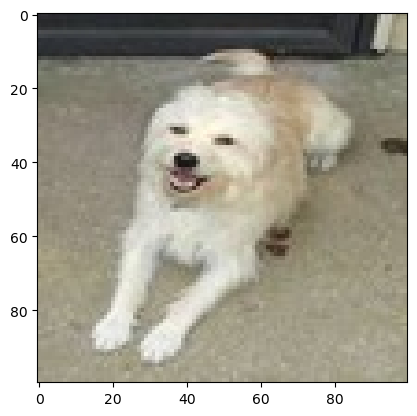

In [110]:
idx=random.randint(0,len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

## Model

In [111]:
#sequential model means the layers are going to be stacked up in the sequence

In [118]:
# 1st parameter of the conv layer are the number of filters we want to use
#next parameter is the size of the filter to be used 


#Dense means fully connected layer (no. of neurons we want to keep in 
#the layer,activation )

#dense =1 because of the binary classification

model=Sequential([Conv2D(32,(3,3),activation='relu',
                         input_shape=(100,100,3)),MaxPooling2D((2,2)),
                        
                       Conv2D(32,(3,3),activation='relu'),
                              MaxPooling2D((2,2)),
                         Flatten(),
                         Dense(64,activation='relu'),
                         Dense(1,activation='sigmoid')
                        ])

In [121]:
#loss=binary_crossentropy because we are using the binary classification

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [192]:
model.fit(x_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
32/32 [==============================] - 6s 198ms/step - loss: 0.0157 - accuracy: 0.9995
Epoch 2/10
32/32 [==============================] - 7s 214ms/step - loss: 0.0108 - accuracy: 1.0000
Epoch 3/10
32/32 [==============================] - 7s 209ms/step - loss: 0.0089 - accuracy: 0.9995
Epoch 4/10
32/32 [==============================] - 7s 225ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 5/10
32/32 [==============================] - 7s 214ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 6/10
32/32 [==============================] - 7s 216ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 7/10
32/32 [==============================] - 7s 221ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 8/10
32/32 [==============================] - 7s 205ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 9/10
32/32 [==============================] - 7s 212ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 10/10
32/32 [==============================] - 7s 205ms/step - loss: 0.0028 - accuracy: 1.0000

In [193]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 0s 30ms/step - loss: 1.7537 - accuracy: 0.6950


[1.7537412643432617, 0.6949999928474426]

## Making Predictions

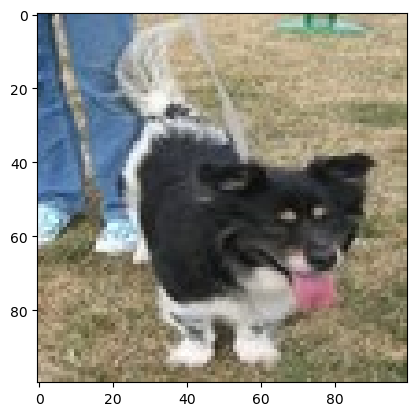

1/1 [==============================] - 0s 19ms/step
[[0.00036084]]


In [194]:
idx2=random.randint(0,len(y_test))
plt.imshow(x_test[idx2,:])
plt.show()

y_pred=model.predict(x_test[idx2,:].reshape(1,100,100,3))
print(y_pred)

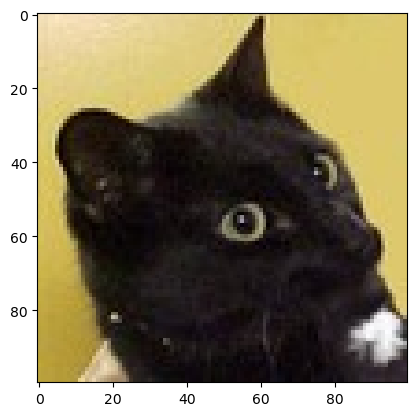

1/1 [==============================] - 0s 20ms/step
It is a : Cat


In [375]:
idx2=random.randint(0,len(y_test))
plt.imshow(x_test[idx2,:])
plt.show()

y_pred=model.predict(x_test[idx2,:].reshape(1,100,100,3))
# y_pred=y_pred > 0.5
if(y_pred<0.5):
    pred="Dog"
else:
    pred="Cat"

print("It is a :",pred)